In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import arviz as az
import pymc as pm
import scipy.stats as stats
import pickle

sns.set(style="ticks", context='poster', font_scale=0.9)
%matplotlib inline

RANDOM_SEED = 8927

In [2]:
def inf_p_eu(G_samples, a=1, b=1, n_total=20):
    n_sets = len(G_samples)
    N_samples = np.repeat(n_total, n_sets)
    group_idx = np.repeat(np.arange(len(N_samples)), N_samples)
    data = []
    for i in range(0, len(N_samples)):
        data.extend(np.repeat([1, 0], [G_samples[i], N_samples[i]-G_samples[i]]))
    with pm.Model() as model_lg:
        ω = pm.Beta('ω', a, b)
        κ = pm.Gamma('κ', 3, 1)
        θ = pm.Beta('θ', alpha=ω*(κ-2)+1, beta=(1-ω)*(κ-2)+1, shape=n_sets)
        y = pm.Bernoulli('y', p=θ[group_idx], observed=data)
        trace = pm.sample(tune=1000, draws=10000, target_accept=0.95, random_seed=RANDOM_SEED, return_inferencedata=True)
    return trace

In [11]:
WT_F1Rev= pd.read_excel('../raw_data/WT_F1Rev.xlsx')

In [20]:
WT_F1Rev_inf = {}
for i in WT.columns:
    sample = WT_F1Rev[i]
    G_samples = np.array(sample[~np.isnan(sample)])
    if np.mean(sample) > 15:
        WT_F1Rev_inf[i] = inf_p_eu(G_samples, 8, 1)
    else:
        WT_F1Rev_inf[i] = inf_p_eu(G_samples, 2, 2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.
There were 1 divergences after tuning. Increase `target_accept` or reparameterize.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 10 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 8 seconds.
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.


In [22]:
WT_F1Rev_inf.keys()

dict_keys(['WT', 'F0', 'F1', 'R1', 'R2', 'R3', 'R4'])

In [24]:
sample = WT_F1Rev['WT']
G_samples = np.array(sample[~np.isnan(sample)])
test = inf_p_eu(G_samples, 2, 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [ω, κ, θ]


Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 9 seconds.


In [27]:
WT_F1Rev_inf['WT'] = test

array([[<Axes: title={'center': 'θ'}>, <Axes: title={'center': 'θ'}>],
       [<Axes: title={'center': 'κ'}>, <Axes: title={'center': 'κ'}>],
       [<Axes: title={'center': 'ω'}>, <Axes: title={'center': 'ω'}>]],
      dtype=object)

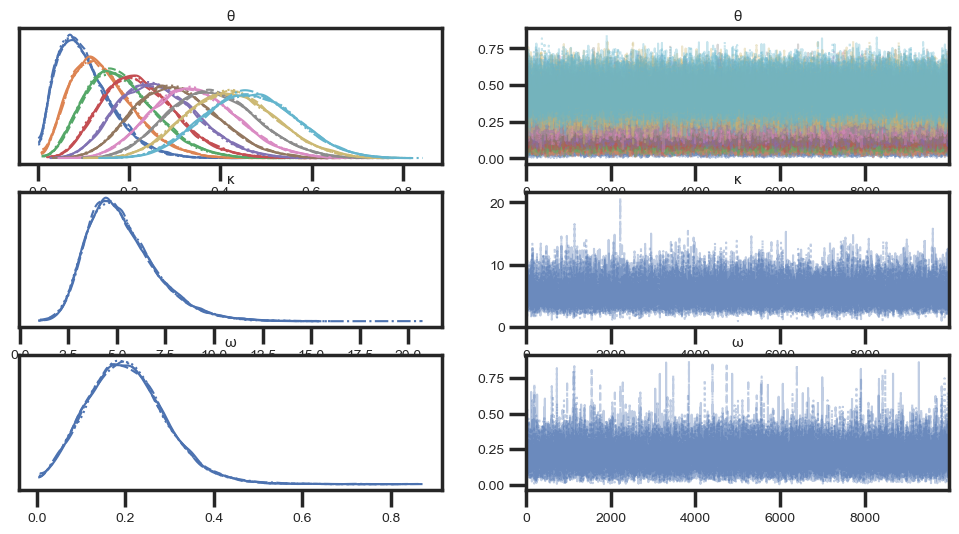

In [25]:
az.plot_trace(test)